## Загружаем нужные библиотеки:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загружаем данные:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [28]:
url = 'https://github.com/OlyaKotova/MachineLearning/tree/master/Data_Cortex_Nuclear(csv).csv'
data = pd.read_csv(url, sep = ',', engine = 'python')

## Заполнение пустых

In [30]:
data.count(axis = 0)

MouseID            1080
DYRK1A_N           1077
ITSN1_N            1077
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1077
pBRAF_N            1077
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1077
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1077
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1073
TRKA_N             1077
                   ... 
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N              1080
GFAP_N             1080
GluR3_N            1080
GluR4_N            1080
IL1B_N             1080
P3525_N         

Существуют пропущенные значения

In [31]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [33]:
# удаление столбцов
data = data.drop('Genotype', axis = 1)  # повотряется
data = data.drop('Treatment', axis = 1) # повотряется
data = data.drop('Behavior', axis = 1)  # повотряется
    
data = data.drop('MouseID', axis = 1)   # индетификатор

In [35]:
X = data.drop(('class'), axis = 1)
y = data['class']

In [36]:
print(X.shape)
print(y.shape)

(1080, 77)
(1080,)


## Разбиваем данные на обучающую и тестовую выборки:

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)
N_test, _ = X_test.shape

In [46]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (2), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [47]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.470679012346
Ошибка на тестовой выборке :  0.537037037037


Ошибка на тестовой выборке больше, чем на обучающей. Возможно, что произошло переобучение из-за большого количества данных.
Увеличим количество нейронов до 10.

In [48]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (10), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [49]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.283950617284
Ошибка на тестовой выборке :  0.298611111111


Уже лучше. Пойдём дальше, увеличив до 50.

In [60]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.00154320987654
Ошибка на тестовой выборке :  0.0532407407407


Хоть ошибка уменьшилась на порядок, но эффект сохранился и даже усилился. Опытным путём было найдено, что
такой эффект происходит при 11 нейронах.

In [66]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (1000), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [67]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке :  0.0277777777778


Попробуем найти оптимальное количество нейронов.

In [68]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier( hidden_layer_sizes = (neuron), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

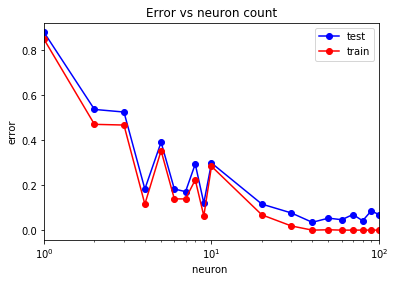

In [69]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

При использовании одного слоя не удается достичь нужного результата.

In [70]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (75, 2), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(75, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [71]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.297839506173
Ошибка на тестовой выборке :  0.349537037037


Переобучение сохранилось, изменим несколько параметров.

In [74]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100, 2), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [75]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.538580246914
Ошибка на тестовой выборке :  0.618055555556


Уже лучше, подсчитаем оптимальные значения.

In [76]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,200,500)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier( hidden_layer_sizes = (neuron, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

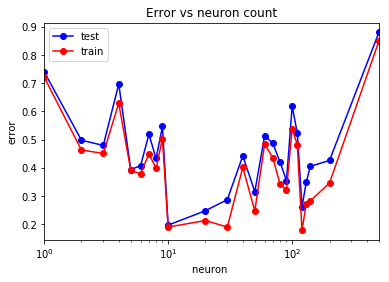

In [77]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

In [78]:
neurons_arr = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,200,500)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier( hidden_layer_sizes = (neuron, 2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

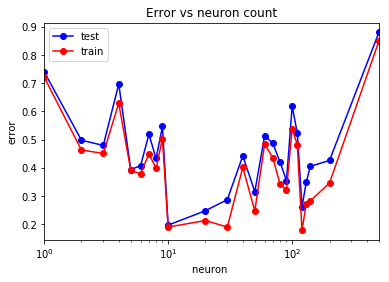

In [79]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.min(neurons_arr), np.max(neurons_arr)])
plt.title('Error vs neuron count')
plt.xlabel('neuron ')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки будет достигаться при количестве нейронов равным 10.

# Найдем оптимальное значение alpha

In [80]:
alpha_arr = np.logspace(-5, 5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 5)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

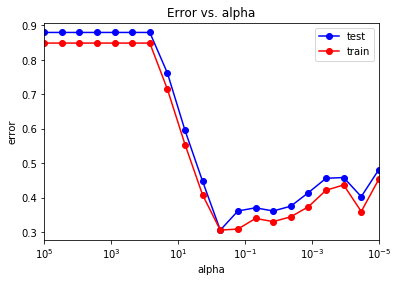

In [81]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [82]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.305555555556 0.305555555556


In [83]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.545559478117


In [91]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (75), solver = 'lbfgs', activation = 'logistic', random_state = 5)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.54555947811685146,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=75, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [92]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке : ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.00771604938272
Ошибка на тестовой выборке :  0.0162037037037


Эффект сохранился, но ошибка сильно уменьшилась.